In [81]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, GlobalAveragePooling2D,MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.models import Sequential
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
#from resnets_utils import *
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline

import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [51]:
img_width, img_height = 256, 256

train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
nb_train_samples = 2313
nb_validation_samples = 495
epochs = 50
batch_size = 16

In [28]:
#pretrained

In [52]:
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3 #ongoing
from keras.applications.densenet import DenseNet201
from keras.applications.densenet import DenseNet201

In [53]:
train_datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)
validation_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    'data/train', classes = ['aztec', 'inca', 'maya', 'nasca','olmec'],
    batch_size=16,
    class_mode='categorical')
validation_generator = validation_datagen.flow_from_directory(
    'data/validation',classes = ['aztec', 'inca', 'maya', 'nasca','olmec'],
    batch_size=16,
    class_mode='categorical')

Found 1714 images belonging to 5 classes.
Found 426 images belonging to 5 classes.


In [54]:
# create the base pre-trained model
base_model = ResNet50(weights='imagenet', include_top=False)

/anaconda3/lib/python3.7/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [55]:
from keras import regularizers
from keras.layers import Dropout
from keras.models import Model

In [56]:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

0 input_4
1 conv1_pad
2 conv1
3 bn_conv1
4 activation_204
5 pool1_pad
6 max_pooling2d_5
7 res2a_branch2a
8 bn2a_branch2a
9 activation_205
10 res2a_branch2b
11 bn2a_branch2b
12 activation_206
13 res2a_branch2c
14 res2a_branch1
15 bn2a_branch2c
16 bn2a_branch1
17 add_1
18 activation_207
19 res2b_branch2a
20 bn2b_branch2a
21 activation_208
22 res2b_branch2b
23 bn2b_branch2b
24 activation_209
25 res2b_branch2c
26 bn2b_branch2c
27 add_2
28 activation_210
29 res2c_branch2a
30 bn2c_branch2a
31 activation_211
32 res2c_branch2b
33 bn2c_branch2b
34 activation_212
35 res2c_branch2c
36 bn2c_branch2c
37 add_3
38 activation_213
39 res3a_branch2a
40 bn3a_branch2a
41 activation_214
42 res3a_branch2b
43 bn3a_branch2b
44 activation_215
45 res3a_branch2c
46 res3a_branch1
47 bn3a_branch2c
48 bn3a_branch1
49 add_4
50 activation_216
51 res3b_branch2a
52 bn3b_branch2a
53 activation_217
54 res3b_branch2b
55 bn3b_branch2b
56 activation_218
57 res3b_branch2c
58 bn3b_branch2c
59 add_5
60 activation_219
61 res3c_

In [66]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(5, activation='softmax')(x)

In [71]:
model = Model(inputs=base_model.input, outputs=predictions)

In [72]:
for layer in base_model.layers:
    layer.trainable = False

In [73]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics = ['acc'])

In [74]:
# Train the model
history = model.fit_generator(train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/30
144/144 [==============================] - 1279s 9s/step - loss: 0.9021 - acc: 0.6619 - val_loss: 1.6294 - val_acc: 0.5084
Epoch 2/30
144/144 [==============================] - 400s 3s/step - loss: 0.7814 - acc: 0.7075 - val_loss: 1.5704 - val_acc: 0.5148
Epoch 3/30
144/144 [==============================] - 404s 3s/step - loss: 0.7234 - acc: 0.7309 - val_loss: 1.8726 - val_acc: 0.4599
Epoch 4/30
144/144 [==============================] - 422s 3s/step - loss: 0.6599 - acc: 0.7544 - val_loss: 1.7432 - val_acc: 0.5464
Epoch 5/30
144/144 [==============================] - 414s 3s/step - loss: 0.6038 - acc: 0.7795 - val_loss: 1.7068 - val_acc: 0.5513
Epoch 6/30
144/144 [==============================] - 626s 4s/step - loss: 0.5554 - acc: 0.7921 - val_loss: 2.0075 - val_acc: 0.5000
Epoch 7/30
144/144 [==============================] - 423s 3s/step - loss: 0.5116 - acc: 0.8074 - val_loss: 1.9336 - val_acc: 0.4979
Epoch 8/30
144/144 [==============================] - 442s 3s/step -

In [48]:
from keras import models
from keras import layers
from keras import optimizers
 
# Create the model
model_resnet50 = models.Sequential()
 
# Add the vgg convolutional base model
model_resnet50.add(base_model)
 
# Add new layers
#model_densenet.add(layers.Flatten())
#model_densenet.add(layers.Dense(1024, activation='relu'))
model_resnet50.add(layers.Dropout(0.5))
model_resnet50.add(layers.Dense(5, activation='sigmoid'))
 
# Show a summary of the model. Check the number of trainable parameters
model_resnet50.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet201 (Model)          (None, None, None, 1920)  18321984  
_________________________________________________________________
dropout_2 (Dropout)          (None, None, None, 1920)  0         
_________________________________________________________________
dense_3 (Dense)              (None, None, None, 5)     9605      
Total params: 18,331,589
Trainable params: 18,102,533
Non-trainable params: 229,056
_________________________________________________________________


In [49]:
#sgd = optimizers.SGD(lr=0.001)
#adadelta = optimizers.Adadelta(lr=0.01, rho=0.95, epsilon=None, decay=0.0)
#model_densenet.compile(loss='categorical_crossentropy',
#              optimizer=adadelta,
#              metrics=['acc'])
# Train the model
#history_densenet = model_densenet.fit_generator(train_generator,
#    steps_per_epoch=nb_train_samples // batch_size,
#    epochs=30,
#    validation_data=validation_generator,
#    validation_steps=nb_validation_samples // batch_size)
 
# Save the model
model.summary()
model.save('resnet50_01.h5')

Epoch 1/30


ValueError: Error when checking target: expected dense_3 to have 4 dimensions, but got array with shape (16, 5)

In [75]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [76]:
#from keras.utils import plot_model
#import pydot
#from IPython.display import SVG
#from keras.utils.vis_utils import model_to_dot
#plot_model(model_resnet, to_file='model.png')
#SVG(model_to_dot(model_resnet).create(prog='dot', format='svg'))

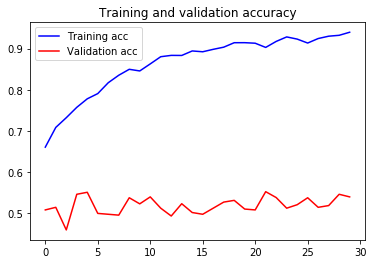

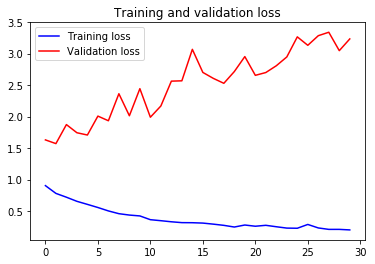

In [77]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [78]:
validation_generator = validation_datagen.flow_from_directory(
        'data/validation', target_size=(img_width, img_height), classes = ['aztec', 'inca', 'maya', 'nasca','olmec'],
    batch_size=16,
    class_mode='categorical', shuffle = False)
# Get the filenames from the generator
fnames = validation_generator.filenames
 
# Get the ground truth from generator
ground_truth = validation_generator.classes
 
# Get the label to class mapping from the generator
label2index = validation_generator.class_indices
 
# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())
 
# Get the predictions from the model using the generator
predictions = model.predict_generator(validation_generator, steps=nb_validation_samples // batch_size,verbose=1)

Found 426 images belonging to 5 classes.
30/30 [==============================] - 77s 3s/step


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  """


No of errors = 1/426


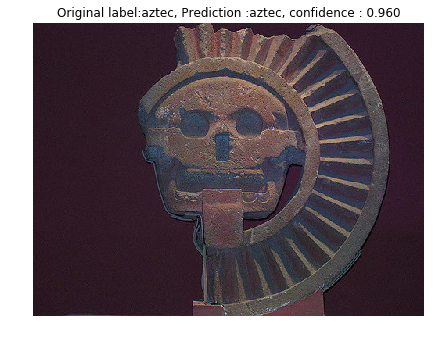

In [79]:
from keras.preprocessing.image import load_img

predicted_classes = np.argmax(predictions,axis=1)
 
errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),validation_generator.samples))
 
# Show the errors
for i in range(len(errors)):
    pred_class = np.argmax(predictions[errors[i]])
    pred_label = idx2label[pred_class]
     
    title = 'Original label:{}, Prediction :{}, confidence : {:.3f}'.format(
        fnames[errors[i]].split('/')[0],
        pred_label,
        predictions[errors[i]][pred_class])
     
    original = load_img('{}/{}'.format('data/validation',fnames[errors[i]]))
    plt.figure(figsize=[7,7])
    plt.axis('off')
    plt.title(title)
    plt.imshow(original)
    plt.show()

In [84]:
reg = 0.0001

model = Sequential()

model.add(Conv2D(8, (3, 3), input_shape=input_shape, padding='same',
                kernel_regularizer=regularizers.l2(reg)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.7))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(16, (3, 3), input_shape=input_shape, padding='same',
                kernel_regularizer=regularizers.l2(reg)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.7))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))


model.add(Conv2D(32, (3, 3), input_shape=input_shape, padding='same',
                kernel_regularizer=regularizers.l2(reg)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.7))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(32, kernel_regularizer=regularizers.l2(reg)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(5))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [85]:
train_datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)
validation_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    'data/train', classes = ['aztec', 'inca', 'maya', 'nasca','olmec'],
    batch_size=16,
    class_mode='categorical')
validation_generator = validation_datagen.flow_from_directory(
    'data/validation',classes = ['aztec', 'inca', 'maya', 'nasca','olmec'],
    batch_size=16,
    class_mode='categorical')

Found 1714 images belonging to 5 classes.
Found 426 images belonging to 5 classes.


In [86]:
history = model.fit_generator(train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/30
144/144 [==============================] - 133s 927ms/step - loss: 1.6510 - acc: 0.2582 - val_loss: 1.7316 - val_acc: 0.2215
Epoch 2/30
144/144 [==============================] - 121s 843ms/step - loss: 1.6464 - acc: 0.2617 - val_loss: 1.6597 - val_acc: 0.2679
Epoch 3/30
144/144 [==============================] - 117s 812ms/step - loss: 1.6523 - acc: 0.2804 - val_loss: 1.6483 - val_acc: 0.2595
Epoch 4/30
144/144 [==============================] - 109s 758ms/step - loss: 1.6483 - acc: 0.2808 - val_loss: 1.6655 - val_acc: 0.2637
Epoch 5/30
144/144 [==============================] - 109s 756ms/step - loss: 1.6273 - acc: 0.2908 - val_loss: 1.6972 - val_acc: 0.2405
Epoch 6/30
144/144 [==============================] - 115s 799ms/step - loss: 1.6252 - acc: 0.2947 - val_loss: 1.6871 - val_acc: 0.2637
Epoch 7/30
144/144 [==============================] - 115s 796ms/step - loss: 1.6271 - acc: 0.3021 - val_loss: 1.6896 - val_acc: 0.2722
Epoch 8/30
144/144 [============================

In [21]:
pred_dir = 'data\test'

In [ ]:
test_generator = test_datagen.flow_from_directory(
    directory=pred_dir,
    target_size=(256, 256),
    batch_size=16,
    class_mode=None,
    shuffle=False
)

In [ ]:
test_generator.reset()

In [ ]:
pred=model_resnet.predict_generator(test_generator,verbose=1,steps=306/batch_size)

In [ ]:
predicted_class_indices=np.argmax(pred,axis=1)

In [ ]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [ ]:
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})

In [ ]:
results

In [33]:
#dropout
from keras.applications import VGG16
from keras.layers import Dropout
from keras.models import Model

model = VGG16(weights='imagenet',include_top=False, input_shape=(256, 256, 3))
# Store the fully connected layers
fc1 = model.layers[-3]
fc2 = model.layers[-2]
predictions = model.layers[-1]

# Create the dropout layers
dropout1 = Dropout(0.85)
dropout2 = Dropout(0.85)

# Reconnect the layers
x = dropout1(fc1.output)
x = fc2(x)
x = dropout2(x)
x = base_model.output
predictors = predictions(x)

# Create a new model
model2 = Model(input=model.input, output=predictors)
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics =['accuracy'])

history2 = model2.fit_generator(train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

ValueError: Input 0 is incompatible with layer global_average_pooling2d_3: expected ndim=4, found ndim=2